In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with = engine)

In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['station', 'measurement']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create a session
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recentdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recentdate

('2017-08-23',)

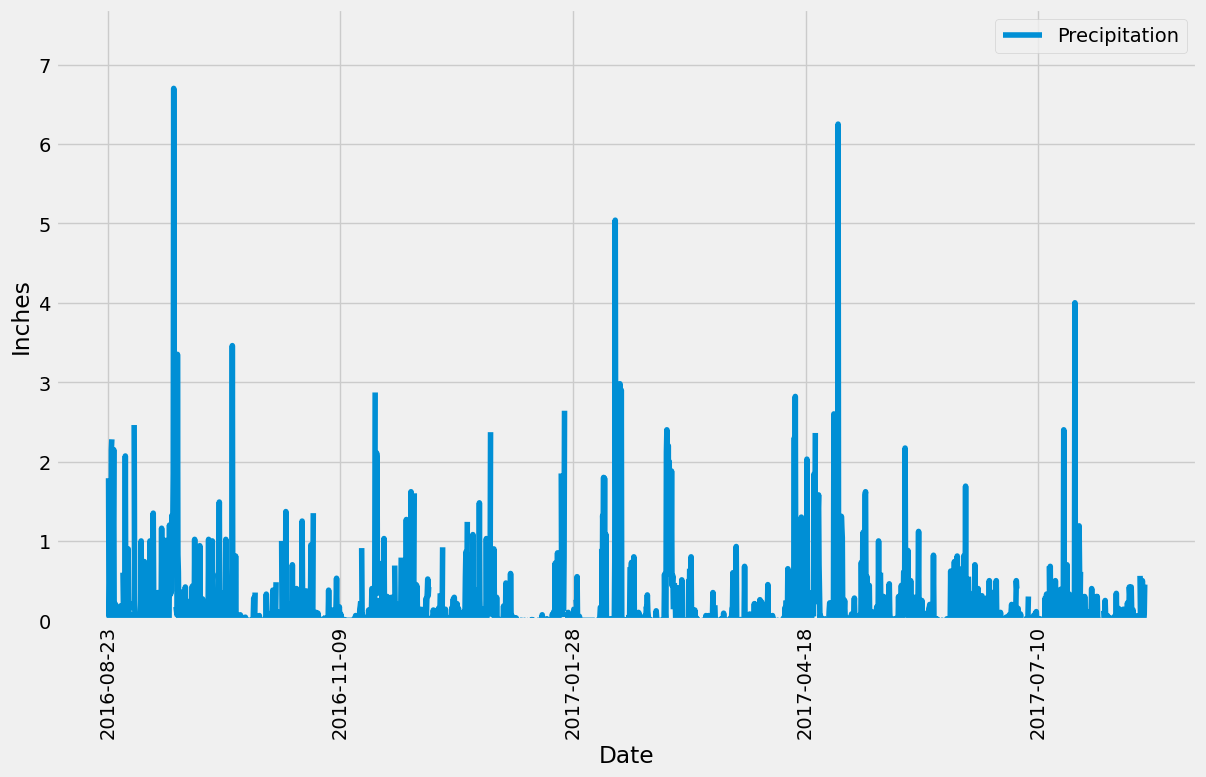

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
recentdate = dt.date(2017,8,23)
# Calculate the date one year from the last date in data set.
last_year_data = recentdate - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
prcpquery = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year_data).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
measurement_df = pd.DataFrame(prcpquery, columns=["Date", "Precipitation"])

# Sort the dataframe by date
measurement_sort = measurement_df.sort_values(by = "Date")

measurement_sort.plot(x="Date",y="Precipitation",figsize = (12,8), rot=90)
plt.ylim(0,7.7)
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Inches')
plt.grid(True)
plt.xticks(rotation=90)
plt.legend(loc = 'upper right')
plt.savefig("Resources/Precipitation_plot.png")
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
measurestats = measurement_sort.describe()
measurestats

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
count_station = session.query(Station.station).count()
count_station

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station,
                              func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_details = [Measurement.station, 
      func.min(Measurement.tobs),
      func.max(Measurement.tobs),
      func.avg(Measurement.tobs)]
most_active = session.query(*temp_details).filter_by(station = "USC00519281").all()

print(f"The lowest temperature for {most_active[0][0]} is {most_active[0][1]}")
print(f"The highest temperature for {most_active[0][0]} is {most_active[0][2]}")
print(f"The average temperature for {most_active[0][0]} is {most_active[0][3]}")

The lowest temperature for USC00519281 is 54.0
The highest temperature for USC00519281 is 85.0
The average temperature for USC00519281 is 71.66378066378067


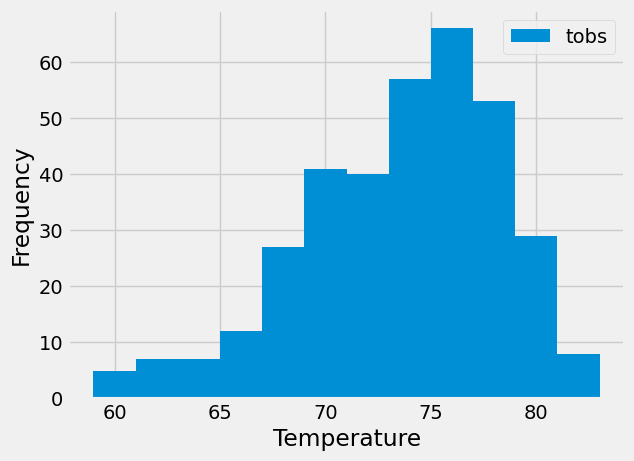

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12months = session.query(Measurement.date, Measurement.tobs).filter_by(station = "USC00519281").\
    filter(Measurement.date >= last_year_data).all()
last_12months_df = pd.DataFrame(last_12months)

last_12months_df.plot(kind = 'hist', bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.savefig("Resources/toba_plot.png")
plt.show()

# Close Session

In [16]:
# Close Session
session.close()
